In [1]:
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import string
import numpy as np
import pandas as pd

In [2]:
!wget --no-check-certificate \
    https://drive.google.com/uc?id=1LiJFZd41ofrWoBtW-pMYsfz1w8Ny0Bj8 \
    -O /tmp/songdata.csv

--2023-07-12 18:30:55--  https://drive.google.com/uc?id=1LiJFZd41ofrWoBtW-pMYsfz1w8Ny0Bj8
Resolving drive.google.com (drive.google.com)... 142.251.171.139, 142.251.171.113, 142.251.171.100, ...
Connecting to drive.google.com (drive.google.com)|142.251.171.139|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://doc-04-ak-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/20g3tuqu944s5j5484nfabdidg4g5t9s/1689186600000/11118900490791463723/*/1LiJFZd41ofrWoBtW-pMYsfz1w8Ny0Bj8?uuid=c0b0d3a9-9b51-4fb2-abc2-f956b6624d89 [following]
--2023-07-12 18:30:59--  https://doc-04-ak-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/20g3tuqu944s5j5484nfabdidg4g5t9s/1689186600000/11118900490791463723/*/1LiJFZd41ofrWoBtW-pMYsfz1w8Ny0Bj8?uuid=c0b0d3a9-9b51-4fb2-abc2-f956b6624d89
Resolving doc-04-ak-docs.googleusercontent.com (doc-04-ak-docs.googleusercontent.com)... 209.85.146.132, 2607:f8b0:4001:c1f::84
Connecting to do

In [3]:
def tokenize_corpus(corpus,num_words=-1):
    if num_words>-1:
        tokenizer = Tokenizer(num_words=num_words)
    else:
        tokenizer = Tokenizer()
    tokenizer.fit_on_texts(corpus)
    return tokenizer

In [4]:
def create_lyrics_corpus(dataset,field):
    dataset[field] = dataset[field].str.replace('[{}]'.format(string.punctuation),'')
    dataset[field] = dataset[field].str.lower()
    lyrics = dataset[field].str.cat()
    corpus = lyrics.split('\n')
    for l in range(len(corpus)):
        corpus[l] = corpus[l].rstrip()
    corpus = [l for l in corpus if l != '']
    return corpus

In [7]:
dataset = pd.read_csv('songdata.csv',dtype=str)[:10]

In [8]:
dataset

,artist,song,link,text
0,ABBA,Ahe's My Kind Of Girl,/a/abba/ahes+my+kind+of+girl_20598417.html,"Look at her face, it's a wonderful face \nAnd..."
1,ABBA,"Andante, Andante",/a/abba/andante+andante_20002708.html,"Take it easy with me, please \nTouch me gentl..."
2,ABBA,As Good As New,/a/abba/as+good+as+new_20003033.html,I'll never know why I had to go \nWhy I had t...
3,ABBA,Bang,/a/abba/bang_20598415.html,Making somebody happy is a question of give an...
4,ABBA,Bang-A-Boomerang,/a/abba/bang+a+boomerang_20002668.html,Making somebody happy is a question of give an...
5,ABBA,Burning My Bridges,/a/abba/burning+my+bridges_20003011.html,"Well, you hoot and you holler and you make me ..."
6,ABBA,Cassandra,/a/abba/cassandra_20002811.html,Down in the street they're all singing and sho...
7,ABBA,Chiquitita,/a/abba/chiquitita_20002978.html,"Chiquitita, tell me what's wrong \nYou're enc..."
8,ABBA,Crazy World,/a/abba/crazy+world_20003013.html,I was out with the morning sun \nCouldn't sle...
9,ABBA,Crying Over You,/a/abba/crying+over+you_20177611.html,I'm waitin' for you baby \nI'm sitting all al...


In [9]:
corpus = create_lyrics_corpus(dataset,'text')

<ipython-input-4-2f3d538caa2f>:2: FutureWarning: The default value of regex will change from True to False in a future version.
  dataset[field] = dataset[field].str.replace('[{}]'.format(string.punctuation),'')


In [10]:
corpus

['look at her face its a wonderful face',
 'and it means something special to me',
 'look at the way that she smiles when she sees me',
 'how lucky can one fellow be',
 'shes just my kind of girl she makes me feel fine',
 'who could ever believe that she could be mine',
 'shes just my kind of girl without her im blue',
 'and if she ever leaves me what could i do what could i do',
 'and when we go for a walk in the park',
 'and she holds me and squeezes my hand',
 'well go on walking for hours and talking',
 'about all the things that we plan',
 'shes just my kind of girl she makes me feel fine',
 'who could ever believe that she could be mine',
 'shes just my kind of girl without her im blue',
 'and if she ever leaves me what could i do what could i do',
 'take it easy with me please',
 'touch me gently like a summer evening breeze',
 'take your time make it slow',
 'andante andante',
 'just let the feeling grow',
 'make your fingers soft and light',
 'let your body be the velvet of th

In [11]:
len(corpus)

341

In [12]:
tokenizer = tokenize_corpus(corpus)
total_words = len(tokenizer.word_index)+1

In [13]:
print(total_words)

495


In [14]:
sequences = []
for line in corpus:
    token_list = tokenizer.texts_to_sequences([line])[0]
    for i in range(1,len(token_list)):
        n_gram_sequence = token_list[:i+1]
        sequences.append(n_gram_sequence)

In [15]:
max_sequence_len = max([len(seq) for seq in sequences])
max_sequence_len

20

In [16]:
sequences = np.array(pad_sequences(sequences,maxlen=max_sequence_len,padding='pre'))
input_sequences, labels = sequences[:,:-1],sequences[:,-1]

In [17]:
one_hot_labels = tf.keras.utils.to_categorical(labels,num_classes=total_words)

In [18]:
print(tokenizer.word_index['know'])

32


In [19]:
print(tokenizer.word_index['feeling'])

97


In [20]:
print(input_sequences[5])

[  0   0   0   0   0   0   0   0   0   0   0   0   0  81  82 142 197  29
   4]


In [21]:
print(input_sequences[6])

[  0   0   0   0   0   0   0   0   0   0   0   0  81  82 142 197  29   4
 287]


In [22]:
print(one_hot_labels[5])

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.

In [23]:
print(one_hot_labels[6])

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.

In [24]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding,LSTM,Dense,Bidirectional

In [25]:
model = Sequential()
model.add(Embedding(total_words,64,input_length=max_sequence_len-1))
model.add(Bidirectional(LSTM(20)))
model.add(Dense(total_words,activation='softmax'))



model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
history = model.fit(input_sequences,one_hot_labels,epochs=200)

Epoch 1/200
62/62 [==============================] - 15s 78ms/step - loss: 5.9937 - accuracy: 0.0368
Epoch 2/200
62/62 [==============================] - 2s 25ms/step - loss: 5.4409 - accuracy: 0.0399
Epoch 3/200
62/62 [==============================] - 1s 19ms/step - loss: 5.3733 - accuracy: 0.0368
Epoch 4/200
62/62 [==============================] - 1s 13ms/step - loss: 5.3214 - accuracy: 0.0444
Epoch 5/200
62/62 [==============================] - 1s 13ms/step - loss: 5.2470 - accuracy: 0.0399
Epoch 6/200
62/62 [==============================] - 1s 9ms/step - loss: 5.1727 - accuracy: 0.0469
Epoch 7/200
62/62 [==============================] - 1s 9ms/step - loss: 5.1035 - accuracy: 0.0520
Epoch 8/200
62/62 [==============================] - 1s 14ms/step - loss: 5.0324 - accuracy: 0.0474
Epoch 9/200
62/62 [==============================] - 1s 15ms/step - loss: 4.9474 - accuracy: 0.0666
Epoch 10/200
62/62 [==============================] - 1s 10ms/step - loss: 4.8646 - accuracy: 0.0943


In [26]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')

In [27]:
def plot_graphs(history,string):
    plt.plot(history.history[string])
    plt.xlabel("Epochs")
    plt.ylabel(string)
    plt.show()

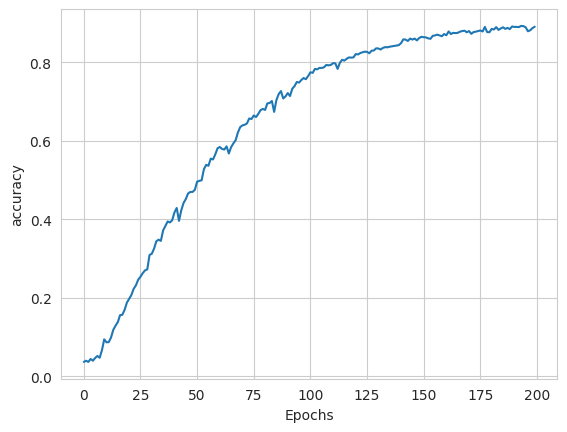

In [28]:
plot_graphs(history,'accuracy')

In [29]:

seed_text = "i m feeling chills"
next_words = 100
for _ in range(next_words):
    token_list = tokenizer.texts_to_sequences([seed_text])[0]
    token_list = pad_sequences([token_list],maxlen=max_sequence_len-1,padding='pre')
    predicted = np.argmax(model.predict(token_list),axis=-1)
    output_word = ""
    for word,index in tokenizer.word_index.items():
        if index == predicted:
            output_word = word
            break
    seed_text += ' '+output_word
print(seed_text)

1/1 [==============================] - 0s 28ms/step
i m feeling chills me down and ship theyre all singing and shouting up deep quiet take sound god god youll fool realized face its good care new new believe yourself a humdehumhum humdehumhum humdehumhum humdehumhum give a ride quiet take give a break new humdehumhum humdehumhum humdehumhum god god god god god god god youll final hope are touch are are touch are touch are touch are touch are crying are crying alone and alone saw and take ma ma ma ma ma ma ma ma ma ma ma ma ma ma ma ma ma ma you did before to girl it girl
